<a href="https://colab.research.google.com/github/nadhirahasya/proyek_analisis_data/blob/main/Copy_of_Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Nadhira Hasya Diandra
- **Email:** nadhira.diandra2002@gmail.com
- **ID Dicoding:** nadhirahsyaa

## Menentukan Pertanyaan Bisnis

- Musim manakah dalam setahun yang memiliki pesanan paling banyak?
- Apakah cuaca dapat mempengaruhi pesanan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv("/content/drive/MyDrive/day.csv")
df_day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [ ]:
df_hour = pd.read_csv("/content/drive/MyDrive/hour.csv")
df_hour.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [ ]:
df_day = pd.DataFrame(df_day)

### Assessing Data

In [ ]:
df_day.duplicated().sum()

0

In [ ]:
df_day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

In [ ]:
# Mengonversi tipe data kolom tertentu menjadi kategori
columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in columns:
    df_day[columns] = df_day[columns].astype('category')

# Mengonversi kolom 'dteday' menjadi tipe data datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [ ]:
df_day.yr.replace((0,1), (2011,2012), inplace=True)

df_day.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

df_day.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

df_day.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

df_day.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

df_day.weathersit.replace((1,2,3,4), ('Clear/Few clouds/Partly cloudy','Mist/Cloudy/Broken clouds/Few clouds','Light Snow/Light Rain/Thunderstorm/Scattered clouds','Heavy Rain/Ice Pallets/Thunderstorm/Mist/Snow/Fog'), inplace=True)

In [ ]:
df_day.head()

instant     dteday  season    yr mnth holiday    weekday workingday  \
0        1 2011-01-01  Winter  2011  Jan       0   Saturday         No   
1        2 2011-01-02  Winter  2011  Jan       0     Sunday         No   
2        3 2011-01-03  Winter  2011  Jan       0     Monday        Yes   
3        4 2011-01-04  Winter  2011  Jan       0    Tuesday        Yes   
4        5 2011-01-05  Winter  2011  Jan       0  Wednesday        Yes   

                             weathersit      temp     atemp       hum  \
0  Mist/Cloudy/Broken clouds/Few clouds  0.344167  0.363625  0.805833   
1  Mist/Cloudy/Broken clouds/Few clouds  0.363478  0.353739  0.696087   
2        Clear/Few clouds/Partly cloudy  0.196364  0.189405  0.437273   
3        Clear/Few clouds/Partly cloudy  0.200000  0.212122  0.590435   
4        Clear/Few clouds/Partly cloudy  0.226957  0.229270  0.436957   

   windspeed  casual  registered   cnt  
0   0.160446     331         654   985  
1   0.248539     131         670   801  
2   0.248309     120        1229  1349  
3   0.160296     108        1454  1562  
4   0.186900      82        1518  1600

### Cleaning Data

In [ ]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
by_yr_and_season = df_day.pivot_table(index='yr', columns='season', values='cnt', aggfunc='sum')

by_yr_and_season

season  Winter  Spring  Summer    Fall
yr                                    
2011    150000  347316  419650  326137
2012    321348  571273  641479  515476

In [ ]:
by_weather_between_2_yr = df_day.pivot_table(index='yr', columns='weathersit', values='cnt', aggfunc='sum')
by_weather_between_2_yr

weathersit  Clear/Few clouds/Partly cloudy  \
yr                                           
2011                                835067   
2012                               1422885   

weathersit  Mist/Cloudy/Broken clouds/Few clouds  \
yr                                                 
2011                                      382924   
2012                                      613934   

weathersit  Light Snow/Light Rain/Thunderstorm/Scattered clouds  
yr                                                               
2011                                                    25112    
2012                                                    12757

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Text(24.000000000000007, 0.5, 'cou')

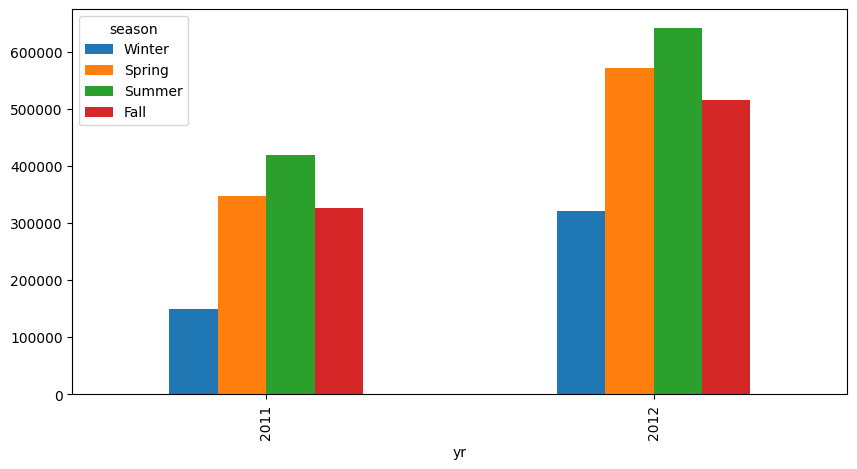

In [ ]:
ax.bar_chart_season = by_season.plot(kind="bar", figsize=(10,5))
ax.set_xlabel('yr')
ax.set_ylabel('cou')

Pada grafik diatas dapat dilihat kalau summer terdapat banyak penyewa sepeda, spring menempati urutan kedua, lalu diikuti dengan fall dan yang terakhir winter


### Pertanyaan 2:

Text(24.000000000000007, 0.5, 'cou')

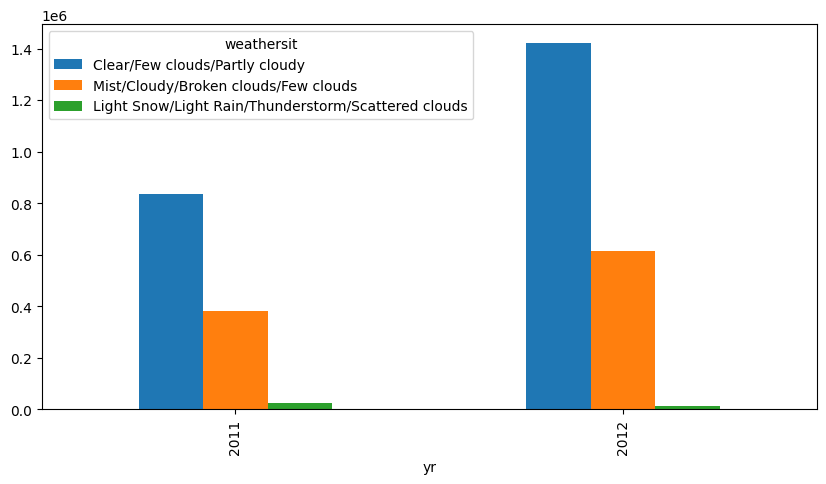

In [ ]:
ax.bar_chart_weather = by_weather.plot(kind="bar", figsize=(10,5))
ax.set_xlabel("yr")
ax.set_ylabel("cou")

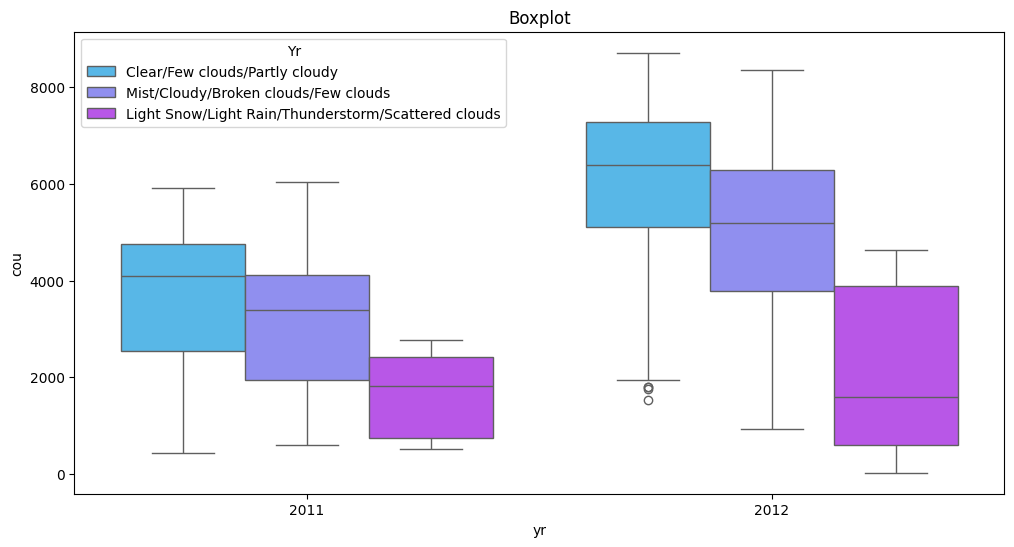

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='yr', y='cnt', hue='weathersit', data=df_day, palette = "cool")
plt.xlabel('yr')
plt.ylabel('cou')
plt.title('Boxplot')
plt.legend(title='Yr')
plt.show()

Pada grafik diatas dapat dilihat kalau cuaca sangat berpengaruh pada penyewaan sepeda. clear/few clouds/partly cloudy terdapat banyak sekali penyewa sepeda, mist/cloudy/broken clouds/few clouds menempati urutan kedua dan yang ketiga yaitu light snow/light rain/thunderstorm/scattered clouds.



## Conclusion

- Conclution pertanyaan 1

Berdasarkan data dan visualisasi, musim rental sepeda yang paling banyak diminati adalah musim panas, disusul musim semi, musim gugur, dan terakhir musim dingin. Musim panas merupakan musim liburan pelajar dan waktu yang populer sepanjang tahun, sehingga bersepeda dan bersepeda dapat menjadi alternatif moda transportasi.

- Conclution pertanyaan 2

Visualisasi yang dibuat menunjukkan bahwa cuaca mempunyai pengaruh yang signifikan terhadap keputusan menyewa sepeda. Pada tahun 2011 dan 2012, cuaca paling populer bagi penyewa adalah langit cerah. Kabut dan salju tipis akan terus berlanjut. Harga sewa yang bergantung pada cuaca menunjukkan pola atau tren serupa selama periode dua tahun. Apalagi, saat hujan lebat, tidak ada penyewa sama sekali karena kondisi cuaca ekstrem membuat bersepeda tidak bisa dilakukan.